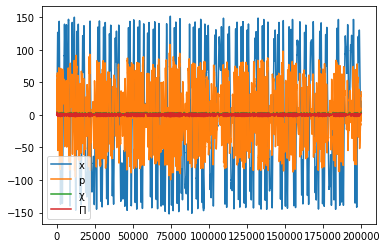

In [46]:
import matplotlib.pyplot as plt
import numpy as np
import sdeint
from scipy.integrate import odeint

g = 0.3
ω = 1
β = 0.01
Γ = 0.1

y0 = np.array([0, 0.1, 0.1, 0.001])
tspan = np.linspace(0, 1000., 200000)


def f(y, t):
    x = y[0]
    p = y[1]
    χ = y[2]
    Π = y[3]
    
    f0 = p
    f1 = -β**2 * x**3 + (1-3*β**2*χ**2) *x - 2*Γ*p + g/β * np.cos(ω*t)
    f2 = 2*(Π + Γ*(χ - χ**3 + χ * Π**2 - 1/(4*χ)))
    f3 = χ*(1-3*β**2*(x**2 + χ**2)) + 1/(4*χ**3) -Γ*(Π + Π*χ**2)
    return np.array([f0, f1, f2, f3])


def GG(y, t):
    x = y[0]
    p = y[1]
    χ = y[2]
    Π = y[3]
    return np.diag([
        2* np.sqrt(Γ)*(χ**2 -1/2),
        2*np.sqrt(Γ) * χ* Π,
        0,
        0])

def GG2 (y,t):
    x = y[0]
    p = y[1]
    χ = y[2]
    Π = y[3]
    return np.diag([
        - 2* np.sqrt (Γ) * χ * Π,
        - 2* np.sqrt (Γ) * (1/2 - Π**2 - 1/(4*χ**2)),
        0,
        0,
    ])

def ξ (y,t):
    return GG(y,t) + GG2(y,t)



result = sdeint.itoint(f, ξ, y0, tspan)

result
plt.plot(result)
plt.legend(["x","p", "χ" , "Π"])
fullArray= [[],[],[],[]]
for i in range (len(result)):
    fullArray[0].append(result[i][0])
    fullArray[1].append(result[i][1])
    fullArray[2].append(result[i][2])
    fullArray[3].append(result[i][3])            
plt.show()

Text(0, 0.5, 'p')

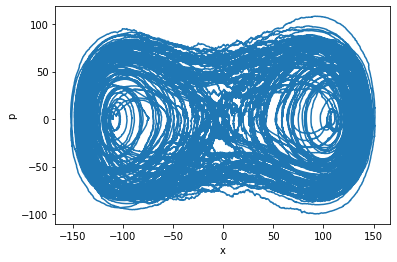

In [48]:
plt.plot(fullArray[0],fullArray[1])
plt.xlabel("x")
plt.ylabel("p")



In [47]:
len(xs)

1600

In [ ]:
x = []
y = []

tspan = np.linspace(0, 5., 100)

t=np.linspace(0, 400*(2*np.pi)/ω, 1600000)
xs = sdeint.itoint(f, ξ, y0, t)


In [104]:
np.savetxt('array.csv', [x,y], delimiter=',')

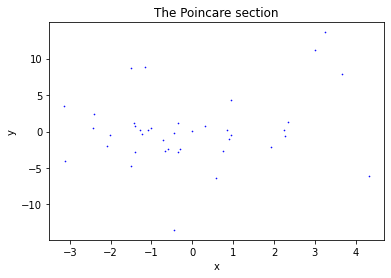

In [19]:
x = [xs[4000*i, 0] for i in range(40)]
y = [xs[4000*i, 1] for i in range(40)]
plt.scatter(x, y, color = 'blue', s=.4)
plt.xlabel('x', fontsize=10)
plt.ylabel('y', fontsize=10)
plt.tick_params(labelsize=10)
plt.title('The Poincare section')
plt.show()

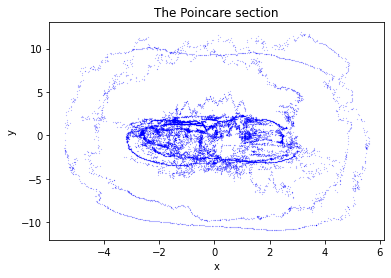

In [16]:
x = [xs[i, 0] for i in range(int(len(xs)/int(10)))]
y = [xs[i, 1] for i in range(int(len(xs)/int(10)))]
plt.scatter(x, y, color = 'blue', s=.01)
plt.xlabel('x', fontsize=10)
plt.ylabel('y', fontsize=10)
plt.tick_params(labelsize=10)
plt.title('The Poincare section')
plt.show()

In [63]:
xs[40*i, 0]

1.188971446741548

In [75]:
xs[4]

array([nan, nan, nan, nan])